In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
df = pd.read_csv("Air Pollution Index for Tehran, Mashhad, Ahvaz, and Isfahan From March to November 2024.CSV")
df.head(5)

,date (persian years),Tehran,Mashhad,Ahvaz,Isfahan
0,01-01-1403,58,106,51,77
1,02-01-1403,40,48,122,93
2,03-01-1403,59,79,85,106
3,04-01-1403,62,103,63,56
4,05-01-1403,57,86,92,60


In [22]:
df.describe()
df['date (persian years)'] = range(len(df))

,date (persian years),Tehran,Mashhad,Ahvaz,Isfahan,day_num
0,0,58,106,51,77,0
1,1,40,48,122,93,1
2,2,59,79,85,106,2
3,3,62,103,63,56,3
4,4,57,86,92,60,4


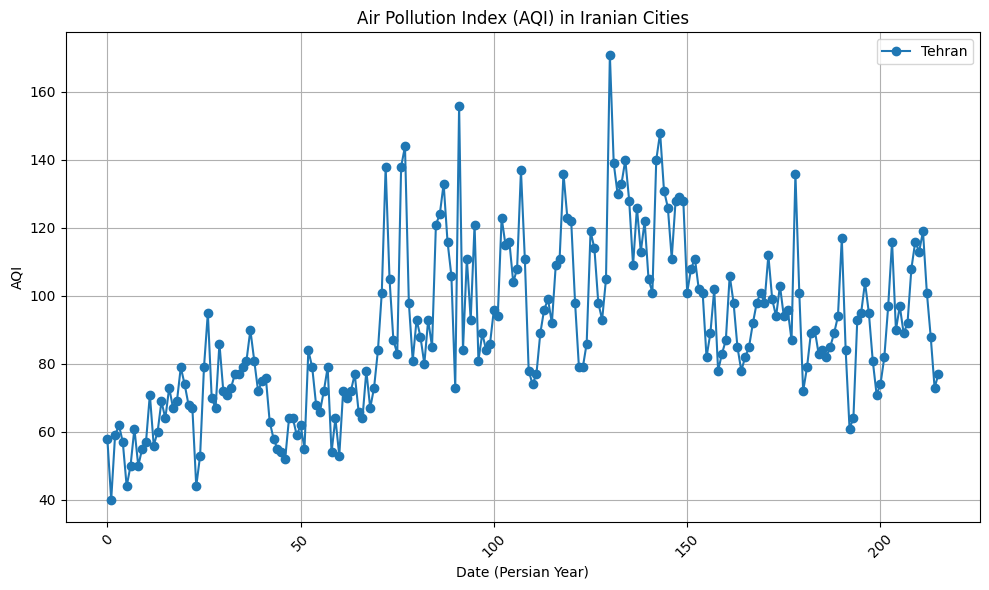

In [23]:
plt.figure(figsize=(10,6))
plt.plot(df['date (persian years)'], df['Tehran'], marker='o', label='Tehran')
# plt.plot(df['date (persian years)'], df['Mashhad'], marker='o', label='Mashhad')
# plt.plot(df['date (persian years)'], df['Ahvaz'], marker='o', label='Ahvaz')
# plt.plot(df['date (persian years)'], df['Isfahan'], marker='o', label='Isfahan')
plt.title('Air Pollution Index (AQI) in Iranian Cities')
plt.xlabel('Date (Persian Year)')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

In [24]:
cities = ['Tehran', 'Mashhad', 'Ahvaz', 'Isfahan']
models = {}
predictions = {}

In [30]:
for city in cities:
    X = df[['date (persian years)']]  
    y = df[city]         
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"{city} - MSE: {mse:.2f}")

    models[city] = model
    predictions[city] = y_pred
    

Tehran - MSE: 173.79
Mashhad - MSE: 266.35
Ahvaz - MSE: 303.66
Isfahan - MSE: 888.29


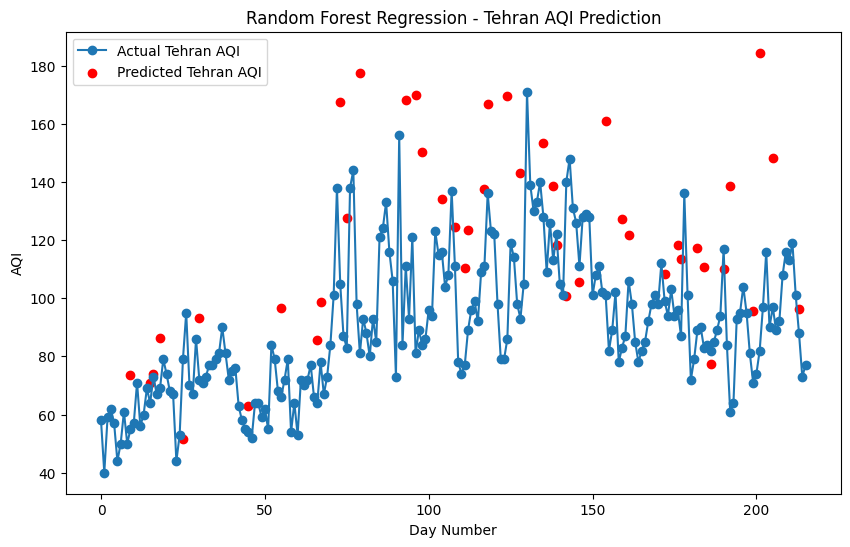

In [31]:
plt.figure(figsize=(10,6))
plt.plot(df['day_num'], df['Tehran'], label='Actual Tehran AQI', marker='o')
plt.scatter(X_test, y_pred, color='red', label='Predicted Tehran AQI')
plt.xlabel('Day Number')
plt.ylabel('AQI')
plt.title('Random Forest Regression - Tehran AQI Prediction')
plt.legend()
plt.show()